### Process Tiff Stack

In [1]:
import time
from pvd_io import *
from pvd_par import PVD
from pvd_metrics import data_summary
from IPython.display import clear_output

# Check slurm job
!squeue -u $USER

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)


### Get data paths

In [2]:
# Get all tiff stacks and their paths
data_dir = 'pvd_data/'
min_file_size = 1e8  # 100 MB
datasets, sessions, files = scan_directories(data_dir, min_file_size)
print(f"Located {len(files)} tiff stacks")

Located 53 tiff stacks


### Batch Process Data

In [3]:
# # Execute pipeline
# for ii, file in enumerate(files):  # Slice like so to get a range of files[:1]
#     clear_output(wait=True)

#     # Set path
#     data_path = 'pvd_data'
#     results_path = 'pvd_analysis'
#     dataset = datasets[ii]
#     session = sessions[ii]
#     output_path = f"{results_path}/{dataset}/{session}/"

#     # Capture and display output
#     output_capture = OutputCapture()
#     sys.stdout = output_capture

#     try:
#         print(f"Processing tiff stack {ii}/{len(files)}")
#         print(f"{datasets[ii]} {sessions[ii]}")
#         pvd = PVD(data_path, dataset, session, file)
#         pvd.run_pipeline()

#         print(f"Saving data to drive...")
#         pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=True, save_labeled_tiff=False)

#     finally:
#         sys.stdout = output_capture.original_stdout

#     # Save cell output
#     with open(f"{output_path}output.txt", 'w') as f:
#         f.write(str(output_capture.get_output()))

#     # Clear memory
#     del pvd

#     time.sleep(1)

# # Create summary file recording MIP similarity between timepoints and segments matched
# data_summary(files, datasets, sessions)

### Single Stack

In [8]:
# Set path to zero-match file
data_path = 'pvd_data'
results_path = 'pvd_analysis'
dataset = 'DataSet00'
session = 'exp240104_00_01_'
file = 'exp240104_00_01.tif'
tiff_stack_path = f"{data_path}/{dataset}/{session}_/{file}"
output_path = f"{results_path}/{dataset}/{session}/"

# Capture and display output
output_capture = OutputCapture()
sys.stdout = output_capture

try:
    pvd = PVD(data_path, dataset, session, file)
    pvd.run_pipeline()

    print(f"Saving data to drive...")
    pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=True, save_labeled_tiff=False)

finally:
    sys.stdout = output_capture.original_stdout

# Save cell output
with open(f"{output_path}pipeline_log.txt", 'w') as f:
    f.write(str(output_capture.get_output()))

time.sleep(1)

Starting pipeline.
Data loaded. Shape: (4, 92, 2044, 2042): 6.64 seconds
Data cropped. Shape: (4, 92, 2000, 2000): 4.61 seconds
Preprocessing complete: 70.50 seconds
Data skeletonized: 140.76 seconds
Number of tips per timepoint: [111, 107, 80, 82]
Number of knots per timepoint: [247, 225, 180, 185]
Outer segments found. Number of outer segments per timepoint: [65, 74, 54, 50]: 2.61 seconds
Matched 23 segments across all timepoints.
Segments matched. Number of matched segments per timepoint: [23, 23, 23, 23]: 0.27 seconds
Unmatched segments grouped: 5.07 seconds
All timepoints labeled successfully
Number of unique labels: 24
Processed data labeled: 20.79 seconds
Volume changes DataFrame generated: 22.48 seconds
Pipeline complete. Total time: 273.72 seconds
Saving data to drive...

Quality Score: 0.6335
Skeleton visualizations saved to pvd_analysis/DataSet00/exp240104_00_01_//visualizations
Outer segment visualizations saved to pvd_analysis/DataSet00/exp240104_00_01_//visualizations
Vol

Starting pipeline.


Data loaded. Shape: (4, 188, 2044, 2042): 15.38 seconds
Data cropped. Shape: (4, 188, 2000, 2000): 9.34 seconds
Preprocessing complete: 152.41 seconds
Data skeletonized: 276.65 seconds
Number of tips per timepoint: [113, 109, 108, 112]
Number of knots per timepoint: [269, 278, 276, 264]
Outer segments found. Number of outer segments per timepoint: [49, 48, 46, 50]: 4.98 seconds
Matched 29 segments across all timepoints.
Segments matched. Number of matched segments per timepoint: [29, 29, 29, 29]: 0.15 seconds
Unmatched segments grouped: 10.13 seconds
All timepoints labeled successfully
Number of unique labels: 30
Processed data labeled: 40.10 seconds
Volume changes DataFrame generated: 46.01 seconds
Pipeline complete. Total time: 555.14 seconds
Saving data to drive...

Quality Score: 0.7967
Skeleton visualizations saved to pvd_analysis/DataSet01/exp240202_01_E_//visualizations
Outer segment visualizations saved to pvd_analysis/DataSet01/exp240202_01_E_//visualizations
Volume changes Da

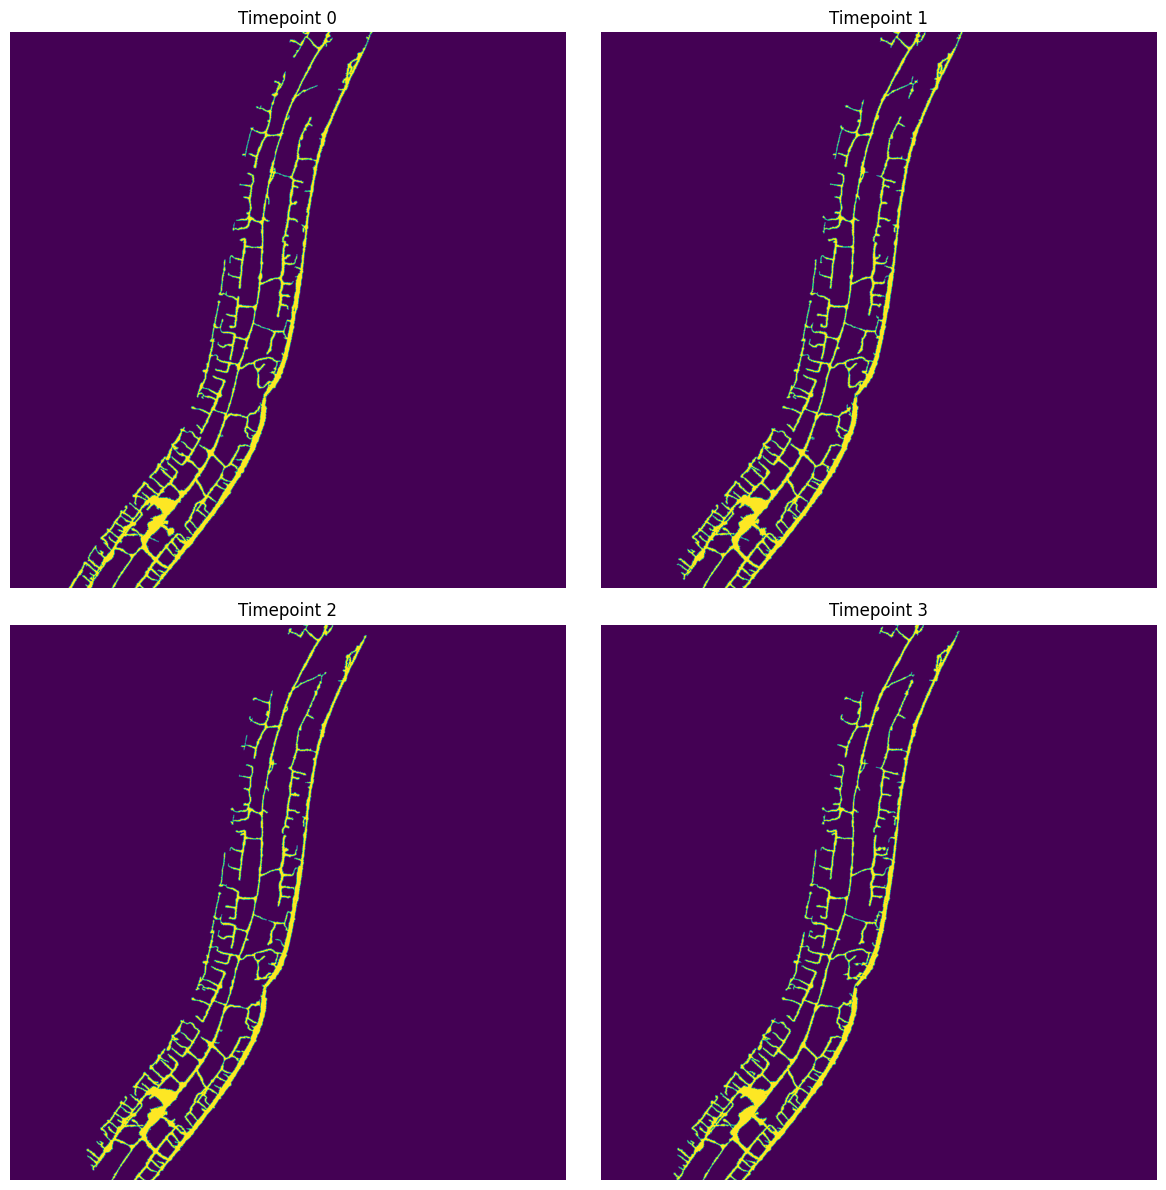

In [5]:
# Set path to original test file
data_path = 'pvd_data'
results_path = 'pvd_analysis'
dataset = 'DataSet01'
session = 'exp240202_01_E_'
file = 'exp240202_01_E.tif'
tiff_stack_path = f"{data_path}/{dataset}/{session}_/{file}"
output_path = f"{results_path}/{dataset}/{session}/"

# Process stack
pvd = PVD(data_path, dataset, session, file)
pvd.run_pipeline()

# Save relevant numpy arrays
print(f"Saving data to drive...")
pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=True, save_labeled_tiff=False)

time.sleep(1)

### Matched Segment Summary

In [6]:
# # add a line to extract the quality score <-- add this to pvd_metrics.py
# import pandas as pd

# # Create a file with a tally of matched segments per tiff stack

# def data_summary(files, datasets, sessions, summary_file="data_summary.txt"):
#     # Summary Report
#     for ii, file in enumerate(files[:14]):
#         results_path = 'pvd_analysis'
#         dataset = datasets[ii]
#         session = sessions[ii]
#         output_path = f"{results_path}/{dataset}/{session}/"

#         segment_csv = pd.read_csv(f"{output_path}segment_change.csv")
#         quality_csv = pd.read_csv(f"{output_path}mip_cosine_similarity.csv")
#         csv_length = segment_csv.shape[1]-3  # Subtract 3 for index and core segment
#         quality_score = quality_csv.loc[5,'t1']  # Get avg. cosine similarity score from csv

#         with open(summary_file, 'a') as file:
#             file.write(f"{dataset} - {session} -- Segments: {csv_length}  Quality: {float(quality_score):.2f}\n")

In [7]:
# data_summary(files, datasets, sessions)